# Random Forest Training

---

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

# For time stamps
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

### Read in CSV as Pandas DataFrame

In [2]:
# Set path to CSV and read in CSV
csv_path = Path('trading_signals.csv')
trading_signals_df=pd.read_csv(csv_path)
trading_signals_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return,fast_close,slow_close,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
0,2011-01-18,12.312857,11.642857,11.768571,12.166071,1.880998e+09,10.495069,NaN,12.166071,12.166071,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,2011-01-19,12.450000,12.031429,12.441071,12.101429,1.135613e+09,10.439302,-0.005313,12.131513,12.133526,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2011-01-20,12.082143,11.790000,12.015357,11.881429,7.647892e+08,10.249522,-0.018180,12.036366,12.048326,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,2011-01-21,11.960000,11.665357,11.920357,11.668571,7.544012e+08,10.065897,-0.017915,11.924512,11.951404,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,2011-01-24,12.051786,11.668571,11.673929,12.051786,5.746832e+08,10.396482,0.032842,11.957463,11.972041,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Set Index, Infer DateTimeFormat, and Drop Extraneous Columns

In [3]:
# Set index as datetime object and drop extraneous columns
trading_signals_df.set_index(pd.to_datetime(trading_signals_df['Date'], infer_datetime_format=True), inplace=True)
trading_signals_df.drop(columns=['Date'], inplace=True)
trading_signals_df.head()

,High,Low,Open,Close,Volume,Adj Close,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-18,12.312857,11.642857,11.768571,12.166071,1.880998e+09,10.495069,NaN,12.166071,12.166071,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-19,12.450000,12.031429,12.441071,12.101429,1.135613e+09,10.439302,-0.005313,12.131513,12.133526,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-20,12.082143,11.790000,12.015357,11.881429,7.647892e+08,10.249522,-0.018180,12.036366,12.048326,0.0,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-21,11.960000,11.665357,11.920357,11.668571,7.544012e+08,10.065897,-0.017915,11.924512,11.951404,0.0,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-24,12.051786,11.668571,11.673929,12.051786,5.746832e+08,10.396482,0.032842,11.957463,11.972041,0.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Set X-Variable List and Filter to Obtain Associated Values

In [4]:
# Set x variable list of features
x_var_list = ['crossover_signal', 'vol_trend_signal', 'bollinger_signal']

# Filter by x-variable list
trading_signals_df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2021-01-11,1.0,1.0,-1.0
2021-01-12,1.0,1.0,-1.0
2021-01-13,1.0,1.0,-1.0
2021-01-14,1.0,1.0,-1.0
2021-01-15,1.0,1.0,-1.0


### Shift the DataFrame Index by 1

In [5]:
# Shift DataFrame values by 1 (this is so we can have a predictor as to whether or not it's a buy or sell)
trading_signals_df[x_var_list] = trading_signals_df[x_var_list].shift(1)
trading_signals_df[x_var_list].tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2021-01-11,1.0,1.0,-1.0
2021-01-12,1.0,1.0,-1.0
2021-01-13,1.0,1.0,-1.0
2021-01-14,1.0,1.0,-1.0
2021-01-15,1.0,1.0,-1.0


### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [6]:
# Drop NAs and replace positive/negative infinity values - because of the moving averages
trading_signals_df.dropna(subset=x_var_list, inplace=True)
trading_signals_df.dropna(subset=['daily_return'], inplace=True)
trading_signals_df = trading_signals_df.replace([np.inf, -np.inf], np.nan)
trading_signals_df.head()

,High,Low,Open,Close,Volume,Adj Close,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_long,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-19,12.450000,12.031429,12.441071,12.101429,1.135613e+09,10.439302,-0.005313,12.131513,12.133526,0.0,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-20,12.082143,11.790000,12.015357,11.881429,7.647892e+08,10.249522,-0.018180,12.036366,12.048326,0.0,...,1.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-21,11.960000,11.665357,11.920357,11.668571,7.544012e+08,10.065897,-0.017915,11.924512,11.951404,0.0,...,1.0,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-24,12.051786,11.668571,11.673929,12.051786,5.746832e+08,10.396482,0.032842,11.957463,11.972041,0.0,...,0.0,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2011-01-25,12.194286,11.948929,12.011786,12.192857,5.468680e+08,10.518175,0.011705,12.011422,12.010131,1.0,...,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0


### Construct the Dependent Variable

In [7]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
trading_signals_df['Positive Return'] = np.where(trading_signals_df['daily_return'] > 0, 1.0, 0.0)
trading_signals_df.head(10)

,High,Low,Open,Close,Volume,Adj Close,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-19,12.450000,12.031429,12.441071,12.101429,1.135613e+09,10.439302,-0.005313,12.131513,12.133526,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-20,12.082143,11.790000,12.015357,11.881429,7.647892e+08,10.249522,-0.018180,12.036366,12.048326,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-21,11.960000,11.665357,11.920357,11.668571,7.544012e+08,10.065897,-0.017915,11.924512,11.951404,0.0,...,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-24,12.051786,11.668571,11.673929,12.051786,5.746832e+08,10.396482,0.032842,11.957463,11.972041,0.0,...,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2011-01-25,12.194286,11.948929,12.011786,12.192857,5.468680e+08,10.518175,0.011705,12.011422,12.010131,1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2011-01-26,12.342857,12.196429,12.248571,12.280357,5.068756e+08,10.593657,0.007176,12.067476,12.050358,1.0,...,0.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2011-01-27,12.310357,12.243929,12.277857,12.257500,2.850260e+08,10.573940,-0.001861,12.104183,12.077525,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-28,12.300000,11.911786,12.291786,12.003571,5.920572e+08,10.354887,-0.020716,12.085912,12.068845,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-31,12.144286,11.939286,11.992857,12.118571,3.772468e+08,10.454092,0.009581,12.091549,12.074133,1.0,...,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


### Assign Training and Testing Windows

In [8]:
# Set the total and training years
years = round((len(trading_signals_df)) / 252)
training_years = round((len(trading_signals_df) * .75) / 252)

In [9]:
# Set up End and Start times for for training and testing windows

# end = datetime.now() --> To use if end date is today
end = datetime(2021,1,5)
start = datetime(end.year - years, end.month, end.day) # Number of years prior to end date

In [10]:
# Construct training start and end dates
training_start =datetime(start.year, start.month, start.day).strftime(format= '%Y-%m-%d')

training_end = datetime(start.year + training_years, start.month, start.day).strftime(format= '%Y-%m-%d')

In [11]:
# Construct testing start and end dates
testing_start =  datetime(start.year + training_years, start.month, start.day + 1).strftime(format= '%Y-%m-%d')

testing_end = datetime(end.year, end.month, end.day).strftime(format= '%Y-%m-%d')

In [12]:
# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2011-01-05
Training End: 2018-01-05
Testing Start: 2018-01-06
Testing End: 2021-01-05


### Separate X and y Training Datasets

In [13]:
# Construct the X_train and y_train datasets
X_train = trading_signals_df[x_var_list][training_start:training_end]
y_train = trading_signals_df['Positive Return'][training_start:training_end]

X_train.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2017-12-29,1.0,1.0,0.0
2018-01-02,1.0,1.0,0.0
2018-01-03,1.0,-1.0,0.0
2018-01-04,1.0,1.0,0.0
2018-01-05,1.0,1.0,0.0


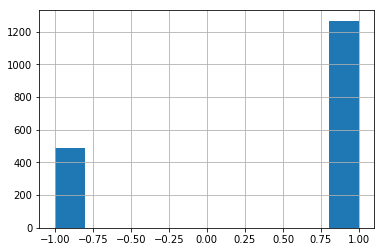

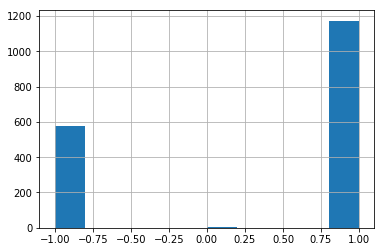

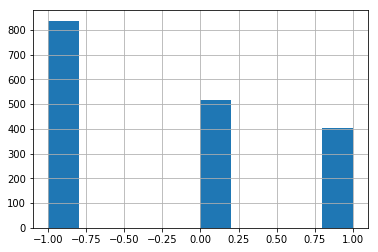

In [14]:
import matplotlib.pyplot as plt # Plot to show the number of instances of each value (-1, 0 or 1) for each of the columns
for each_column in X_train.columns: 
    X_train[each_column].hist()
    plt.show()

In [15]:
y_train.tail()

Date
2017-12-29    0.0
2018-01-02    1.0
2018-01-03    0.0
2018-01-04    1.0
2018-01-05    1.0
Name: Positive Return, dtype: float64

### Separate X and y Testing Datasets

In [16]:
# Construct the X test and y test datasets
X_test = trading_signals_df[x_var_list][testing_start:testing_end]
y_test = trading_signals_df['Positive Return'][testing_start:testing_end]

X_test.tail()

,crossover_signal,vol_trend_signal,bollinger_signal
Date,,,
2020-12-29,1.0,1.0,-1.0
2020-12-30,1.0,1.0,-1.0
2020-12-31,1.0,1.0,-1.0
2021-01-04,1.0,1.0,-1.0
2021-01-05,1.0,1.0,-1.0


In [17]:
y_test.tail()

Date
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
2021-01-04    0.0
2021-01-05    1.0
Name: Positive Return, dtype: float64

### Import SKLearn Library and Classes

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### Train Random Forest Model 

In [19]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train)
# Initiate and fit model:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0) # Max Depth was 3
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Actual Value"] = predictions
Results.head(15)

,Positive Return,Actual Value
Date,,
2018-01-08,0.0,1.0
2018-01-09,0.0,1.0
2018-01-10,0.0,1.0
2018-01-11,1.0,1.0
2018-01-12,1.0,1.0
2018-01-16,0.0,1.0
2018-01-17,1.0,1.0
2018-01-18,1.0,1.0
2018-01-19,0.0,1.0


In [20]:
trading_signals_df.head(5)

,High,Low,Open,Close,Volume,Adj Close,daily_return,fast_close,slow_close,crossover_long,...,vol_trend_short,vol_trend_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal,Positive Return
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-19,12.450000,12.031429,12.441071,12.101429,1.135613e+09,10.439302,-0.005313,12.131513,12.133526,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-20,12.082143,11.790000,12.015357,11.881429,7.647892e+08,10.249522,-0.018180,12.036366,12.048326,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-21,11.960000,11.665357,11.920357,11.668571,7.544012e+08,10.065897,-0.017915,11.924512,11.951404,0.0,...,0.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2011-01-24,12.051786,11.668571,11.673929,12.051786,5.746832e+08,10.396482,0.032842,11.957463,11.972041,0.0,...,-1.0,1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
2011-01-25,12.194286,11.948929,12.011786,12.192857,5.468680e+08,10.518175,0.011705,12.011422,12.010131,1.0,...,-1.0,-1.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [31]:
Results.head(5)

,Positive Return,Actual Value,Return
Date,,,
2018-01-08,0.0,1.0,-0.003714
2018-01-09,0.0,1.0,-0.000115
2018-01-10,0.0,1.0,-0.000229
2018-01-11,1.0,1.0,0.005680
2018-01-12,1.0,1.0,0.010326


In [32]:
model.feature_importances_ # See how important each of the factors are

array([0.3011043 , 0.28696912, 0.41192659])

In [33]:
model.score(X_train, y_train) # Check on the model's effectiveness

0.5273660205245154

In [24]:
model.score(X_test, y_test) # Check on the model's effectiveness

0.5424403183023873

### Save Pre-Trained Model Using Joblib

In [25]:
# Save the pre-trained model
from joblib import dump, load
dump(model, 'random_forest_model-AAPL.joblib')

['random_forest_model-AAPL.joblib']

### Save X_test and Results dataframes as CSV files

In [26]:
X_test.to_csv(r'X_test.csv')

In [27]:
Results['Return']=trading_signals_df['daily_return'] # Add the daily_return column to Results dataframe
Results.head(20)

,Positive Return,Actual Value,Return
Date,,,
2018-01-08,0.0,1.0,-0.003714
2018-01-09,0.0,1.0,-0.000115
2018-01-10,0.0,1.0,-0.000229
2018-01-11,1.0,1.0,0.005680
2018-01-12,1.0,1.0,0.010326
2018-01-16,0.0,1.0,-0.005082
2018-01-17,1.0,1.0,0.016516
2018-01-18,1.0,1.0,0.000893
2018-01-19,0.0,1.0,-0.004463


In [28]:
Results.to_csv(r'results.csv')